## Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

## Load Data

In [ ]:
df = pd.read_csv('/Users/liamrobinson/Desktop/Climate_Neutral/Data_Carbon_Neutral_City.csv', encoding='utf-8', sep=';')
# Option 1: Disable scientific notation globally
pd.set_option('display.float_format', '{:,.2f}'.format)
df = df.iloc[:-1]


In [22]:
df["Systems"] = df["Systems"].astype(str) 

# List of columns you want to convert
columns_to_convert = [
    'Area (m2)', 'Emission (kg/yr)', 'Storage (kg)', 'Uptake (kg/yr)',
    'Uptake Min', 'Uptake Max', 'Emission Min', 'Emission Max'
]

# Remove dots and convert to float
for col in columns_to_convert:
    df[col] = df[col].str.replace('.', '', regex=False)  # remove thousands separator
    df[col] = pd.to_numeric(df[col], errors='coerce')    # convert to float

In [23]:
print(df.head())

        Systems  Area (m2)  Emission (kg/yr)  Storage (kg)  Uptake (kg/yr)  \
0       Forests   15650000          19682048     538285908        21966118   
1       Streets    9280000            432758      21423785               0   
2     Buildings   28480000        1539344000      65748859               0   
3  Street Trees     140404            152163      21133610          298183   
4         Parks    3070000            307000      13200244          356255   

   Uptake Min  Uptake Max  Emission Min  Emission Max  
0    19945594    23986641      18014872      21349224  
1           0           0        347873        517642  
2           0           0     173728000    2904960000  
3      124609      471757         65639        238687  
4      236307      528941        107450        506550  


## Overview Graphs

In [5]:
# Convert kg to tonnes
kg_to_tonnes = 1 / 1000

# Total values in tonnes
total_emission = df['Emission (kg/yr)'].sum() * kg_to_tonnes
total_uptake = df['Uptake (kg/yr)'].sum() * kg_to_tonnes

# Total Emissions Humans
total_emission_humans = (432758+1539344000)* kg_to_tonnes

# Total carbon storage (converted from kg to tonnes)
total_storage = df['Storage (kg)'].sum() / 1000  # tonnes

print("Total emissions in tonnes:")
print("total emissions:", total_emission)
print("total uptake", total_uptake)
print("total human emissions:", total_emission_humans)
print("total storage:" ,total_storage)

Total emissions in tonnes:
total emissions: 1561009.304
total uptake 22736.765
total human emissions: 1539776.7580000001
total storage: 661049.044


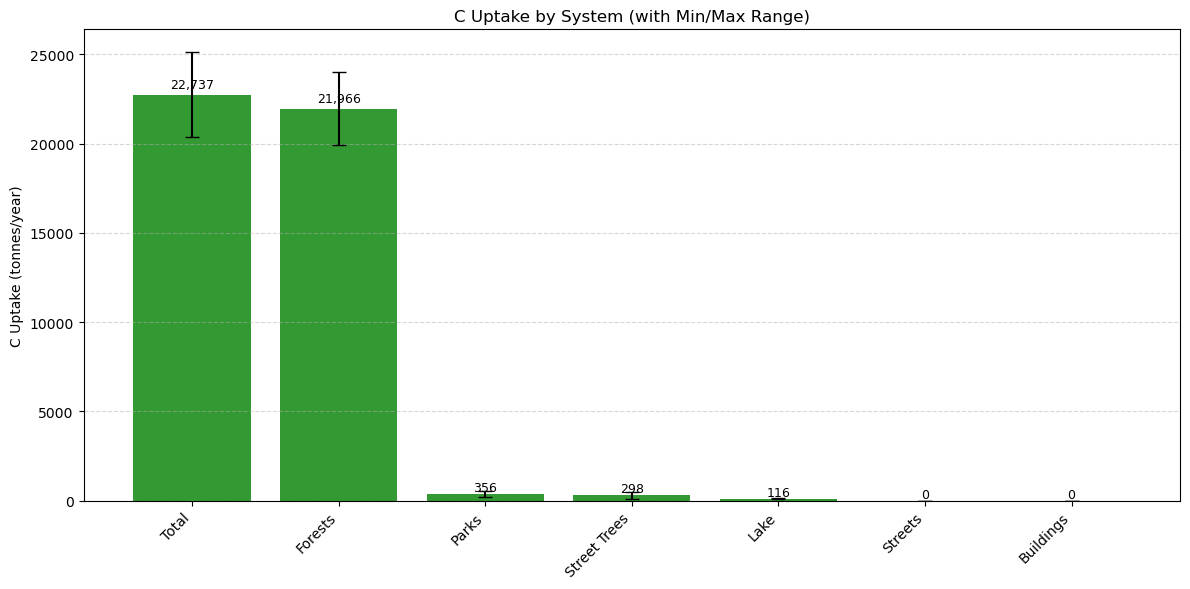

In [7]:
# Convert uptake values to tonnes
df['Uptake (t/yr)'] = df['Uptake (kg/yr)'] / 1000
df['Uptake Min (t/yr)'] = df['Uptake Min'] / 1000
df['Uptake Max (t/yr)'] = df['Uptake Max'] / 1000

# Calculate error bars
df['Uptake Lower Error'] = df['Uptake (t/yr)'] - df['Uptake Min (t/yr)']
df['Uptake Upper Error'] = df['Uptake Max (t/yr)'] - df['Uptake (t/yr)']

# Sort by uptake descending (excluding total)
df_sorted = df.sort_values(by='Uptake (t/yr)', ascending=False).copy()

# Compute total values
total_uptake = df_sorted['Uptake (t/yr)'].sum()
total_min = df_sorted['Uptake Min (t/yr)'].sum()
total_max = df_sorted['Uptake Max (t/yr)'].sum()

# Create total row
total_row = pd.DataFrame([{
    'Systems': 'Total',
    'Uptake (t/yr)': total_uptake,
    'Uptake Min (t/yr)': total_min,
    'Uptake Max (t/yr)': total_max,
    'Uptake Lower Error': total_uptake - total_min,
    'Uptake Upper Error': total_max - total_uptake
}])

# Insert total at the top
df_sorted = pd.concat([total_row, df_sorted], ignore_index=True)

# Plot data
x = df_sorted['Systems']
y = df_sorted['Uptake (t/yr)']
yerr = [df_sorted['Uptake Lower Error'], df_sorted['Uptake Upper Error']]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, y, yerr=yerr, capsize=5, color='green', alpha=0.8)

# Add labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + height * 0.01, f"{height:,.0f}",
            ha='center', va='bottom', fontsize=9)

# Styling
ax.set_ylabel("C Uptake (tonnes/year)")
ax.set_title("C Uptake by System (with Min/Max Range)")
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

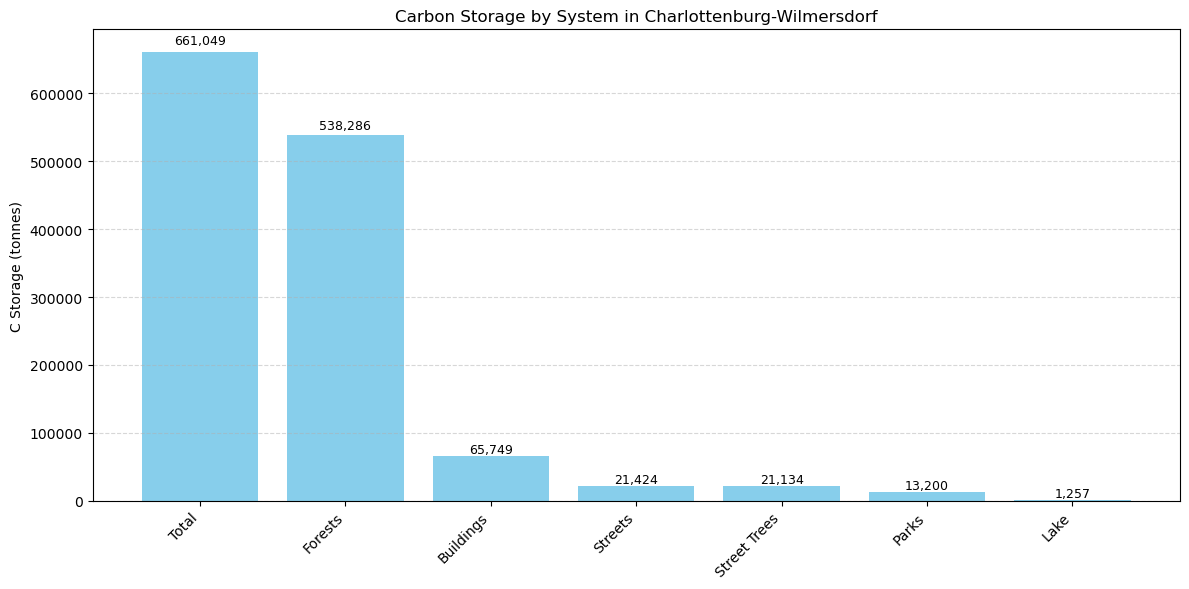

In [24]:
# Convert storage from kg to tonnes
df['Storage (t)'] = df['Storage (kg)'] / 1000

# Sort by storage descending
df_sorted = df.sort_values(by='Storage (t)', ascending=False).copy()

# Calculate total storage
total_storage = df_sorted['Storage (t)'].sum()

# Create a total row and insert at the top
total_row = pd.DataFrame([{
    'Systems': 'Total',
    'Storage (t)': total_storage
}])

df_sorted = pd.concat([total_row, df_sorted[['Systems', 'Storage (t)']]], ignore_index=True)

# Prepare data for plotting
x = df_sorted['Systems']
y = df_sorted['Storage (t)']

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, y, color='skyblue')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + height * 0.01,
            f"{height:,.0f}", ha='center', va='bottom', fontsize=9)

# Styling
ax.set_ylabel("C Storage (tonnes)")
ax.set_title("Carbon Storage by System in Charlottenburg-Wilmersdorf")
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [9]:
# Convert values from kg to tonnes
total_emission = df['Emission (kg/yr)'].sum() / 1000
total_uptake = df['Uptake (kg/yr)'].sum() / 1000

emission_min = df['Emission Min'].sum() / 1000
emission_max = df['Emission Max'].sum() / 1000
uptake_min = df['Uptake Min'].sum() / 1000
uptake_max = df['Uptake Max'].sum() / 1000

# Net balance
net_avg = total_uptake - total_emission
net_min = uptake_min - emission_max
net_max = uptake_max - emission_min

# Output
print(f"--- District-Wide CO₂ Net Balance ---")
print(f"Total Emissions:     {total_emission:,.0f} t/year")
print(f"Total Uptake:        {total_uptake:,.0f} t/year")
print(f"Net Balance (avg):   {net_avg:,.0f} t/year")
print(f"Net Balance (min):   {net_min:,.0f} t/year")
print(f"Net Balance (max):   {net_max:,.0f} t/year")

--- District-Wide CO₂ Net Balance ---
Total Emissions:     1,561,009 t/year
Total Uptake:        22,737 t/year
Net Balance (avg):   -1,538,273 t/year
Net Balance (min):   -2,909,748 t/year
Net Balance (max):   -167,133 t/year


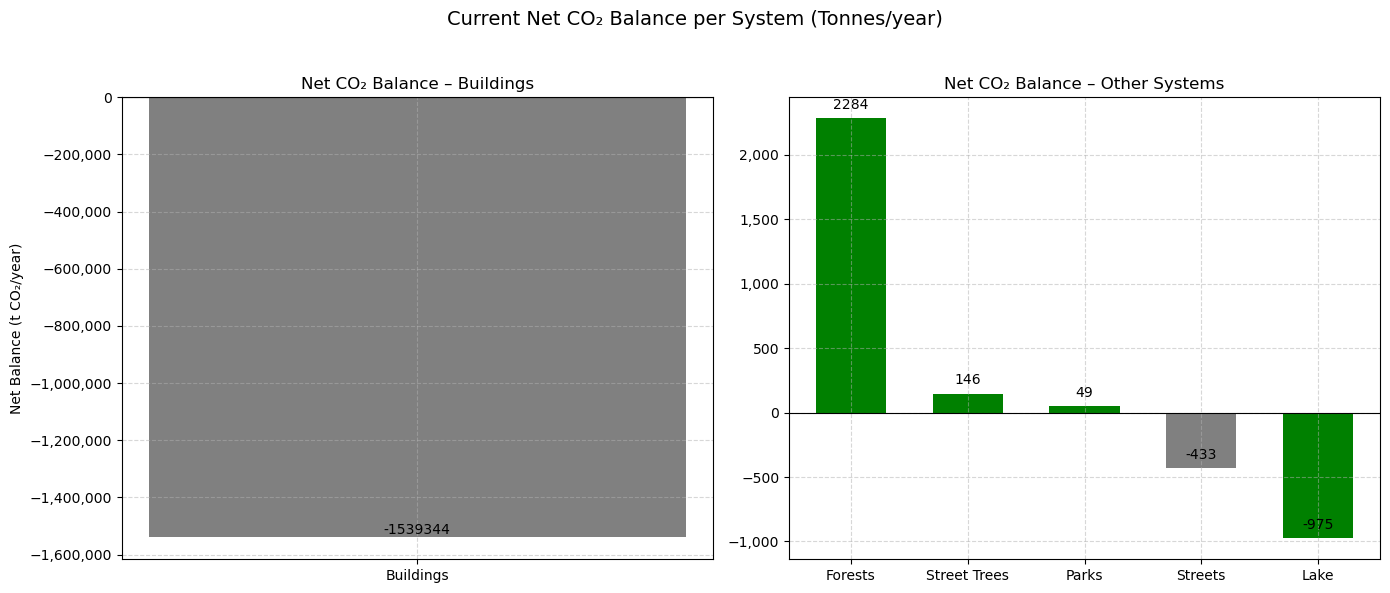

In [16]:
import matplotlib.ticker as ticker

# Clean system names to avoid whitespace issues
df['Systems'] = df['Systems'].str.strip()

# Calculate net balance in tonnes
df['Net Balance (t/yr)'] = (df['Uptake (kg/yr)'] - df['Emission (kg/yr)']) / 1000

# Function to assign colors correctly
def assign_color(system):
    system = system.strip().lower()
    if system in ['buildings', 'streets']:
        return 'gray'
    elif system == 'lakes':
        return 'blue'
    else:
        return 'green'

df['Color'] = df['Systems'].apply(assign_color)

# Split datasets
df_buildings = df[df['Systems'].str.lower() == 'buildings']
df_others = df[df['Systems'].str.lower() != 'buildings'].copy()
df_others = df_others.sort_values(by='Net Balance (t/yr)', ascending=False)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Buildings
ax1.bar(df_buildings['Systems'], df_buildings['Net Balance (t/yr)'],
        color=df_buildings['Color'], width=0.3)

for idx, row in df_buildings.iterrows():
    ax1.text(row['Systems'], row['Net Balance (t/yr)'] + 50, f"{row['Net Balance (t/yr)']:.0f}",
             ha='center', va='bottom', fontsize=10)

ax1.set_title('Net CO₂ Balance – Buildings')
ax1.set_ylabel('Net Balance (t CO₂/year)')
ax1.axhline(0, color='black', linewidth=0.8)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Plot Other Systems
ax2.bar(df_others['Systems'], df_others['Net Balance (t/yr)'],
        color=df_others['Color'], width=0.6)

for idx, row in df_others.iterrows():
    ax2.text(row['Systems'], row['Net Balance (t/yr)'] + 50, f"{row['Net Balance (t/yr)']:.0f}",
             ha='center', va='bottom', fontsize=10)

ax2.set_title('Net CO₂ Balance – Other Systems')
ax2.axhline(0, color='black', linewidth=0.8)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Final layout
plt.suptitle("Current Net CO₂ Balance per System (Tonnes/year)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Scenario 1: Emissions are down

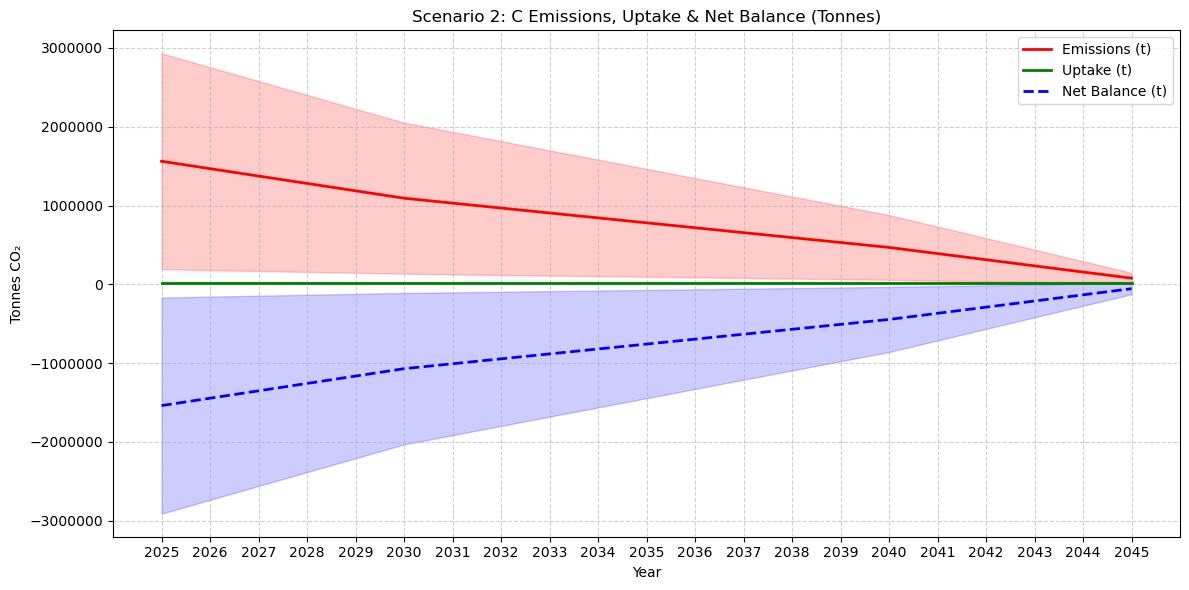

In [25]:
# Timeline from 2025 to 2045
years = np.arange(2025, 2046)

# Stepwise reduction factors for emissions
reduction_factors = []
for year in years:
    if year <= 2030:
        factor = 1 - 0.30 * (year - 2025) / 5
    elif year <= 2040:
        factor = 0.70 - 0.40 * (year - 2030) / 10
    else:
        factor = 0.30 - 0.25 * (year - 2040) / 5
    reduction_factors.append(factor)
emission_factors = np.array(reduction_factors)

# Sum annual base values (converted to tonnes)
emission_base_t = df['Emission (kg/yr)'].sum() / 1000
emission_min_t = df['Emission Min'].sum() / 1000
emission_max_t = df['Emission Max'].sum() / 1000
uptake_total_t = df['Uptake (kg/yr)'].sum() / 1000
uptake_min_t = df['Uptake Min'].sum() / 1000
uptake_max_t = df['Uptake Max'].sum() / 1000

# Calculate values for each year
emissions = emission_base_t * emission_factors
emissions_min = emission_min_t * emission_factors
emissions_max = emission_max_t * emission_factors

uptakes = np.full_like(emissions, uptake_total_t)
uptakes_min = np.full_like(emissions, uptake_min_t)
uptakes_max = np.full_like(emissions, uptake_max_t)

# Net balance and bounds
net_balance = uptakes - emissions
net_min = uptakes_min - emissions_max
net_max = uptakes_max - emissions_min

# Find first year with positive net balance
positive_year = None
for i, val in enumerate(net_balance):
    if val > 0:
        positive_year = years[i]
        break

# Plotting
plt.figure(figsize=(12, 6))

# Main lines
plt.plot(years, emissions, label='Emissions (t)', color='red', linewidth=2)
plt.plot(years, uptakes, label='Uptake (t)', color='green', linewidth=2)
plt.plot(years, net_balance, label='Net Balance (t)', color='blue', linestyle='--', linewidth=2)

# Error bands
plt.fill_between(years, emissions_min, emissions_max, color='red', alpha=0.2)
plt.fill_between(years, uptakes_min, uptakes_max, color='green', alpha=0.2)
plt.fill_between(years, net_min, net_max, color='blue', alpha=0.2)

# Highlight first net-positive year
if positive_year:
    idx = np.where(years == positive_year)[0][0]
    plt.scatter(positive_year, net_balance[idx], s=100, edgecolors='black',
                facecolors='none', linewidths=2,
                label=f'Net Positive Balance ({positive_year})')

# Formatting
plt.title('Scenario 2: C Emissions, Uptake & Net Balance (Tonnes)')
plt.xlabel('Year')
plt.ylabel('Tonnes CO₂')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ticklabel_format(style='plain', axis='y')  # No scientific notation
plt.legend()
plt.tight_layout()
plt.xticks(years)  # Set integer year labels on x-axis
plt.show()

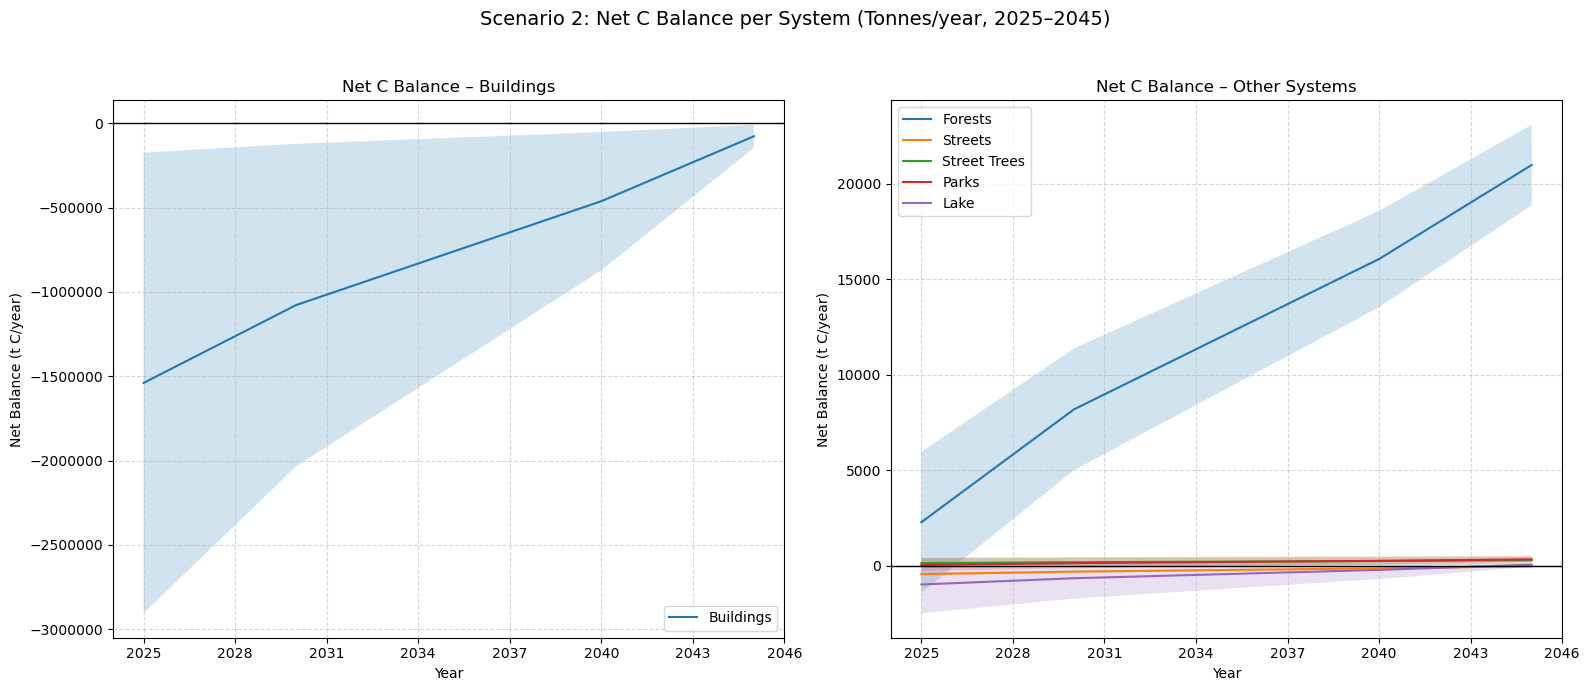

In [ ]:
# Define years and reduction factors for Scenario 2
years = np.arange(2025, 2046)
n_years = len(years)

reduction_factors = []
for year in years:
    if year <= 2030:
        factor = 1 - 0.30 * (year - 2025) / 5
    elif year <= 2040:
        factor = 0.70 - 0.40 * (year - 2030) / 10
    else:
        factor = 0.30 - 0.25 * (year - 2040) / 5
    reduction_factors.append(factor)
emission_factors = np.array(reduction_factors)

# Prepare subplots with separate y-axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

for idx, row in df.iterrows():
    system = row['Systems'].strip()  # Clean system name

    # Emissions over time (tonnes)
    emissions = (row['Emission (kg/yr)'] / 1000) * emission_factors
    emissions_min = (row['Emission Min'] / 1000) * emission_factors
    emissions_max = (row['Emission Max'] / 1000) * emission_factors

    # Uptake (tonnes) - constant over time
    uptake = np.full(n_years, row['Uptake (kg/yr)'] / 1000)
    uptake_min = np.full(n_years, row['Uptake Min'] / 1000)
    uptake_max = np.full(n_years, row['Uptake Max'] / 1000)

    # Net balance and error
    net = uptake - emissions
    net_min = uptake_min - emissions_max
    net_max = uptake_max - emissions_min

    # Choose subplot
    ax = ax1 if system.lower() == 'buildings' else ax2
    ax.plot(years, net, label=system)
    ax.fill_between(years, net_min, net_max, alpha=0.2)

from matplotlib.ticker import MaxNLocator

# Format Buildings plot
ax1.set_title('Net C Balance – Buildings')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Balance (t C/year)')
ax1.axhline(0, color='black', linewidth=1)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.ticklabel_format(style='plain', axis='y')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  
ax1.legend()

# Format Other Systems plot
ax2.set_title('Net C Balance – Other Systems')
ax2.set_xlabel('Year')
ax2.set_ylabel('Net Balance (t C/year)')
ax2.axhline(0, color='black', linewidth=1)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.ticklabel_format(style='plain', axis='y')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))  
ax2.legend()

# Layout and show
plt.suptitle("Scenario 2: Net C Balance per System (Tonnes/year, 2025–2045)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

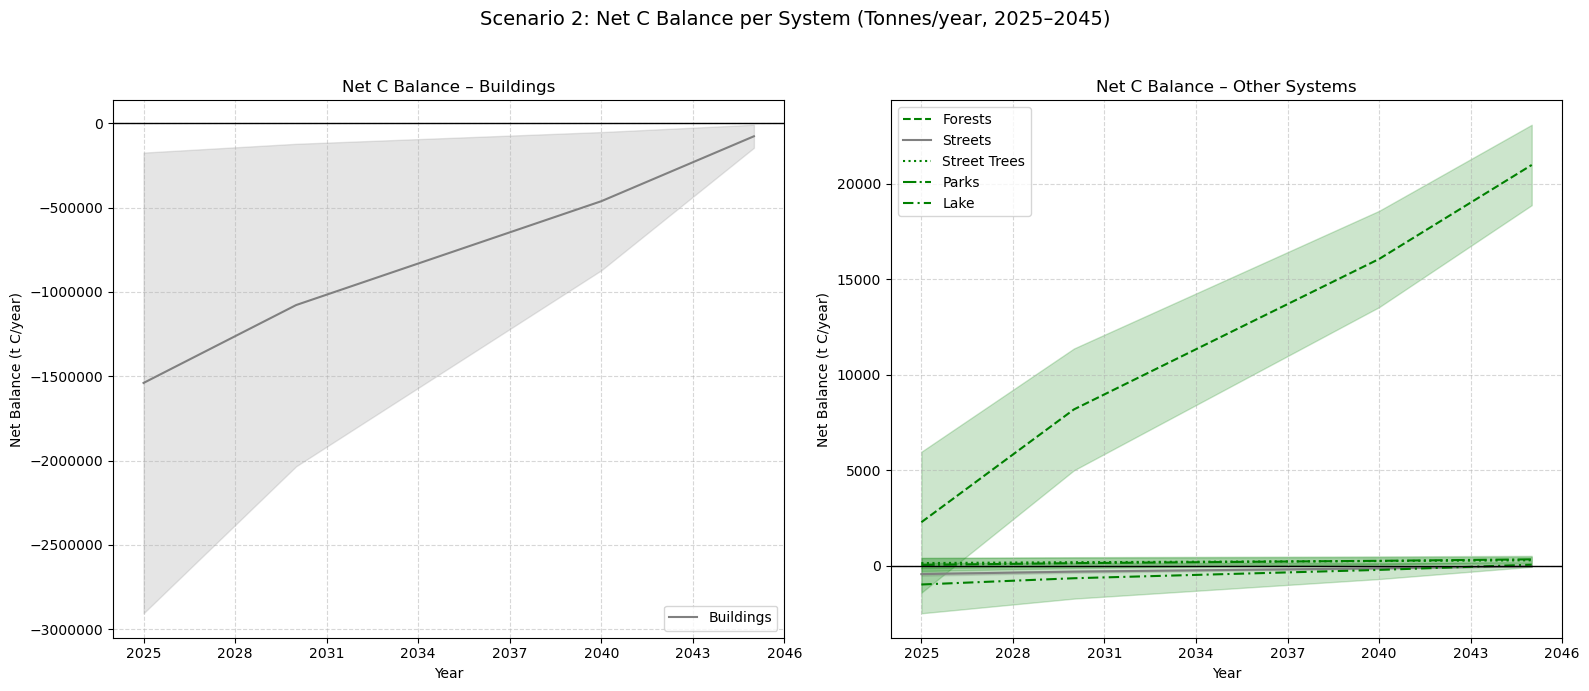

In [33]:
from matplotlib.ticker import MaxNLocator

# Define years and reduction factors for Scenario 2
years = np.arange(2025, 2046)
n_years = len(years)

reduction_factors = []
for year in years:
    if year <= 2030:
        factor = 1 - 0.30 * (year - 2025) / 5
    elif year <= 2040:
        factor = 0.70 - 0.40 * (year - 2030) / 10
    else:
        factor = 0.30 - 0.25 * (year - 2040) / 5
    reduction_factors.append(factor)
emission_factors = np.array(reduction_factors)

# Define line styles for vegetation systems
green_line_styles = ['--', ':', '-.', (0, (5, 2, 1, 2))]  # You can expand this list if needed
style_index = 0

# Prepare subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

for idx, row in df.iterrows():
    system = row['Systems'].strip().lower()

    # Emissions and uptake in tonnes
    emissions = (row['Emission (kg/yr)'] / 1000) * emission_factors
    emissions_min = (row['Emission Min'] / 1000) * emission_factors
    emissions_max = (row['Emission Max'] / 1000) * emission_factors

    uptake = np.full(n_years, row['Uptake (kg/yr)'] / 1000)
    uptake_min = np.full(n_years, row['Uptake Min'] / 1000)
    uptake_max = np.full(n_years, row['Uptake Max'] / 1000)

    net = uptake - emissions
    net_min = uptake_min - emissions_max
    net_max = uptake_max - emissions_min

    # Color and line style assignment
    if system in ['buildings', 'streets']:
        color = 'gray'
        linestyle = '-'
    elif system == 'lakes':
        color = 'blue'
        linestyle = '-'
    else:
        color = 'green'
        linestyle = green_line_styles[style_index % len(green_line_styles)]
        style_index += 1

    ax = ax1 if system == 'buildings' else ax2
    ax.plot(years, net, label=row['Systems'], color=color, linestyle=linestyle)
    ax.fill_between(years, net_min, net_max, alpha=0.2, color=color)

# Format left plot (Buildings)
ax1.set_title('Net C Balance – Buildings')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Balance (t C/year)')
ax1.axhline(0, color='black', linewidth=1)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.ticklabel_format(style='plain', axis='y')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.legend()

# Format right plot (Other Systems)
ax2.set_title('Net C Balance – Other Systems')
ax2.set_xlabel('Year')
ax2.set_ylabel('Net Balance (t C/year)')
ax2.axhline(0, color='black', linewidth=1)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.ticklabel_format(style='plain', axis='y')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.legend()

# Final layout
plt.suptitle("Scenario 2: Net C Balance per System (Tonnes/year, 2025–2045)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Scenario 2: Emissions down and uptake up 

In [34]:
# Define timeline
years = np.arange(2025, 2046)

# Clean the Systems column
df['Systems'] = df['Systems'].str.strip()

# Extract park data
parks = df[df['Systems'] == 'Parks'].iloc[0]
park_area_now = parks['Area (m2)']
park_uptake_now = parks['Uptake (kg/yr)']
park_uptake_min = parks['Uptake Min']
park_uptake_max = parks['Uptake Max']

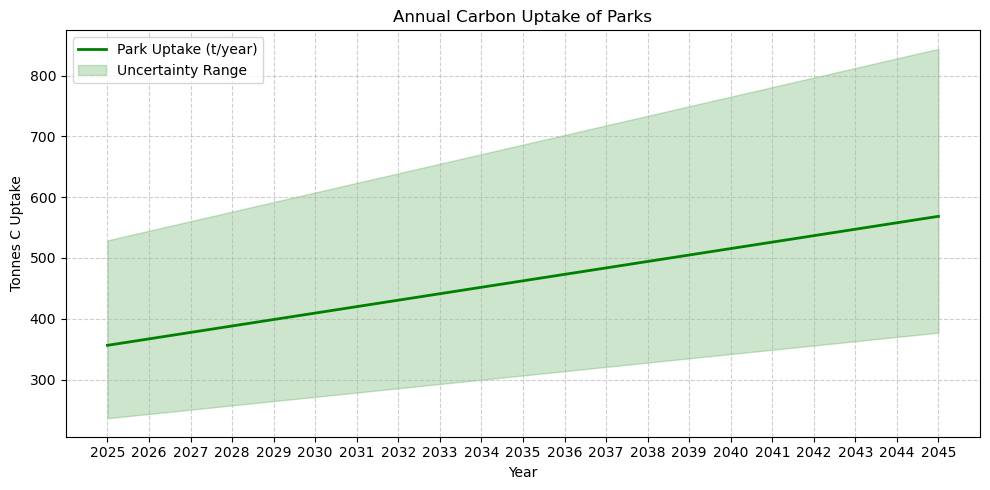

In [35]:
# Define timeline
years = np.arange(2025, 2046)

# Extract park data
parks = df[df['Systems'] == 'Parks'].iloc[0]
park_area_now = parks['Area (m2)']
park_uptake_now = parks['Uptake (kg/yr)']
park_uptake_min = parks['Uptake Min']
park_uptake_max = parks['Uptake Max']

# New park area (192 ha = 1,920,000 m²)
area_added = 1_920_000
annual_area_increase = area_added / len(years)

# Calculate uptake for each year
park_uptakes = []
park_uptakes_min = []
park_uptakes_max = []

for i in range(len(years)):
    area_year = park_area_now + (i * annual_area_increase)
    scale = area_year / park_area_now
    park_uptakes.append(park_uptake_now * scale / 1000)
    park_uptakes_min.append(park_uptake_min * scale / 1000)
    park_uptakes_max.append(park_uptake_max * scale / 1000)

park_uptakes = np.array(park_uptakes)
park_uptakes_min = np.array(park_uptakes_min)
park_uptakes_max = np.array(park_uptakes_max)

# Plotting
plt.figure(figsize=(10, 5))

# Main line
plt.plot(years, park_uptakes, label='Park Uptake (t/year)', color='green', linewidth=2)

# Shaded error band
plt.fill_between(
    years,
    park_uptakes_min,
    park_uptakes_max,
    color='green',
    alpha=0.2,
    label='Uncertainty Range'
)

# Formatting
plt.title('Annual Carbon Uptake of Parks')
plt.xlabel('Year')
plt.ylabel('Tonnes C Uptake')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.xticks(years)
plt.show()

In [36]:
# Timeline
years = np.arange(2025, 2046)

# Extract park data
parks = df[df['Systems'] == 'Parks'].iloc[0]
park_area_now = parks['Area (m2)']
park_uptake_now = parks['Uptake (kg/yr)']
park_uptake_min = parks['Uptake Min']
park_uptake_max = parks['Uptake Max']

# New park area over time (192 ha = 1,920,000 m²)
area_added = 1_920_000
annual_area_increase = area_added / len(years)

# Calculate annual uptakes
park_uptakes = []
park_uptakes_min = []
park_uptakes_max = []

for i in range(len(years)):
    area_year = park_area_now + (i * annual_area_increase)
    scale = area_year / park_area_now
    park_uptakes.append(park_uptake_now * scale / 1000)
    park_uptakes_min.append(park_uptake_min * scale / 1000)
    park_uptakes_max.append(park_uptake_max * scale / 1000)

park_uptakes = np.array(park_uptakes)
park_uptakes_min = np.array(park_uptakes_min)
park_uptakes_max = np.array(park_uptakes_max)

# Create table
uptake_table = pd.DataFrame({
    'Year': years,
    'Park Uptake (t/year)': park_uptakes,
    'Uptake Min (t/year)': park_uptakes_min,
    'Uptake Max (t/year)': park_uptakes_max,
    'Increase from 2025 (t)': park_uptakes - park_uptakes[0],
    '% Increase from 2025': (park_uptakes - park_uptakes[0]) / park_uptakes[0] * 100
})

# Display table
print(uptake_table.to_string(index=False))

 Year  Park Uptake (t/year)  Uptake Min (t/year)  Uptake Max (t/year)  Increase from 2025 (t)  % Increase from 2025
 2025                356.25               236.31               528.94                    0.00                  0.00
 2026                366.86               243.34               544.69                   10.61                  2.98
 2027                377.47               250.38               560.45                   21.22                  5.96
 2028                388.08               257.42               576.20                   31.83                  8.93
 2029                398.69               264.46               591.95                   42.44                 11.91
 2030                409.30               271.49               607.70                   53.05                 14.89
 2031                419.91               278.53               623.46                   63.66                 17.87
 2032                430.52               285.57               639.21   

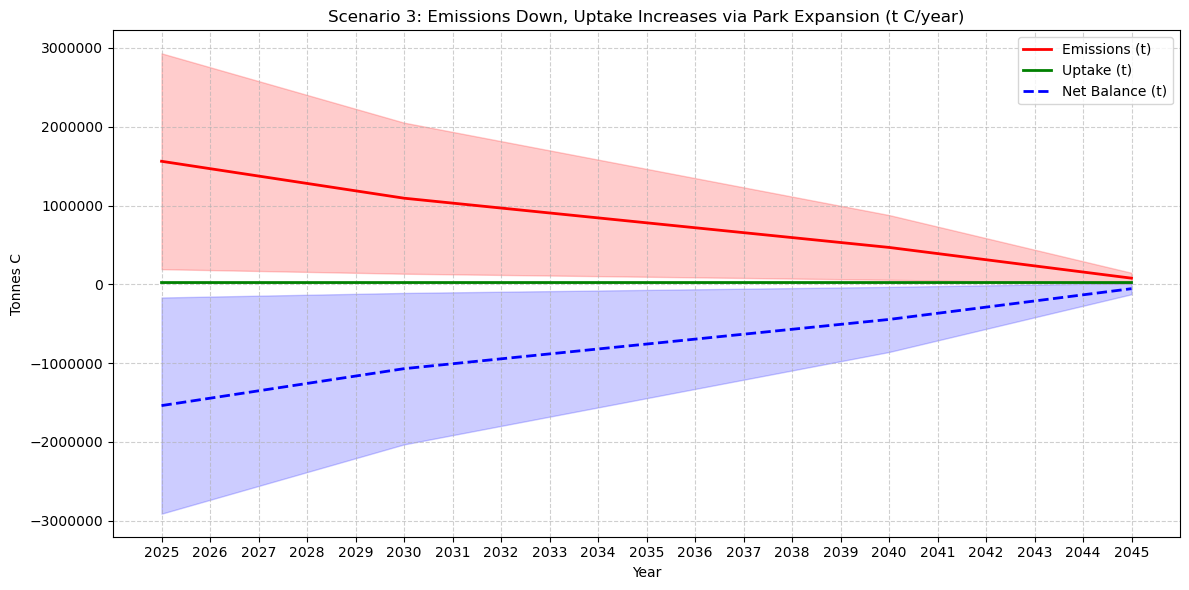

In [37]:
# Timeline
years = np.arange(2025, 2046)
n_years = len(years)

# Emission reduction factors
reduction_factors = []
for year in years:
    if year <= 2030:
        factor = 1 - 0.30 * (year - 2025) / 5
    elif year <= 2040:
        factor = 0.70 - 0.40 * (year - 2030) / 10
    else:
        factor = 0.30 - 0.25 * (year - 2040) / 5
    reduction_factors.append(factor)
emission_factors = np.array(reduction_factors)

# Separate parks and others
parks = df[df['Systems'] == 'Parks'].iloc[0]
others = df[df['Systems'] != 'Parks']

# Park data
park_area_now = parks['Area (m2)']
park_uptake_now = parks['Uptake (kg/yr)']
park_uptake_min = parks['Uptake Min']
park_uptake_max = parks['Uptake Max']

# Area to be added: 192 ha = 1,920,000 m²
area_added = 1_920_000
annual_area_increase = area_added / n_years

# Compute dynamic uptake for parks
park_uptakes = []
park_uptakes_min = []
park_uptakes_max = []

for i in range(n_years):
    area_year = park_area_now + (i * annual_area_increase)
    scale = area_year / park_area_now
    park_uptakes.append(park_uptake_now * scale)
    park_uptakes_min.append(park_uptake_min * scale)
    park_uptakes_max.append(park_uptake_max * scale)

# Convert to tonnes
park_uptakes = np.array(park_uptakes) / 1000
park_uptakes_min = np.array(park_uptakes_min) / 1000
park_uptakes_max = np.array(park_uptakes_max) / 1000

# Emissions and uptake from other systems
emission_base_t = df['Emission (kg/yr)'].sum() / 1000
emission_min_t = df['Emission Min'].sum() / 1000
emission_max_t = df['Emission Max'].sum() / 1000

uptake_base_t = others['Uptake (kg/yr)'].sum() / 1000
uptake_min_t = others['Uptake Min'].sum() / 1000
uptake_max_t = others['Uptake Max'].sum() / 1000

# Total uptakes including parks
uptakes = uptake_base_t + park_uptakes
uptakes_min = uptake_min_t + park_uptakes_min
uptakes_max = uptake_max_t + park_uptakes_max

# Emissions per year
emissions = emission_base_t * emission_factors
emissions_min = emission_min_t * emission_factors
emissions_max = emission_max_t * emission_factors

# Net balance
net_balance = uptakes - emissions
net_min = uptakes_min - emissions_max
net_max = uptakes_max - emissions_min

# Find first positive year
positive_year = None
for i, val in enumerate(net_balance):
    if val > 0:
        positive_year = years[i]
        break

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(years, emissions, label='Emissions (t)', color='red', linewidth=2)
plt.plot(years, uptakes, label='Uptake (t)', color='green', linewidth=2)
plt.plot(years, net_balance, label='Net Balance (t)', color='blue', linestyle='--', linewidth=2)

# Error bands
plt.fill_between(years, emissions_min, emissions_max, color='red', alpha=0.2)
plt.fill_between(years, uptakes_min, uptakes_max, color='green', alpha=0.2)
plt.fill_between(years, net_min, net_max, color='blue', alpha=0.2)

# Highlight first positive balance
if positive_year:
    idx = np.where(years == positive_year)[0][0]
    plt.scatter(positive_year, net_balance[idx], s=100, edgecolors='black',
                facecolors='none', linewidths=2,
                label=f'Net Positive Balance ({positive_year})')

# Labels and formatting
plt.title('Scenario 3: Emissions Down, Uptake Increases via Park Expansion (t C/year)')
plt.xlabel('Year')
plt.ylabel('Tonnes C')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()
plt.xticks(years)
plt.show()

## Calculation for Carbon Neutrality

In [26]:
# Calculate total emissions and uptake in tonnes
emission_base_t = df['Emission (kg/yr)'].sum() / 1000
uptake_total_t = df['Uptake (kg/yr)'].sum() / 1000

# Calculate required emission reduction to reach net-zero
required_reduction_fraction = 1 - (uptake_total_t / emission_base_t)
required_reduction_percent = required_reduction_fraction * 100

# Output result
print(f"To reach net-zero CO₂ balance, emissions must decrease by approximately {required_reduction_percent:.2f}% from 2025 levels.")

To reach net-zero CO₂ balance, emissions must decrease by approximately 98.54% from 2025 levels.


In [28]:
# Set up constants
years = np.arange(2025, 2046)
n_years = len(years)

# Park transformation: 192 ha = 1,920,000 m²
park_row = df[df['Systems'] == 'Parks'].iloc[0]
park_area_now = park_row['Area (m2)']
park_uptake_now = park_row['Uptake (kg/yr)']
annual_area_increase = 1_920_000 / n_years

# Calculate park uptake growth over time (in tonnes)
park_uptakes = []
for i in range(n_years):
    new_area = park_area_now + i * annual_area_increase
    scale = new_area / park_area_now
    park_uptake_year = park_uptake_now * scale / 1000  # to tonnes
    park_uptakes.append(park_uptake_year)
park_uptakes = np.array(park_uptakes)

# Sum of constant uptake from other systems (in tonnes/year)
non_park_uptake = df[df['Systems'] != 'Parks']['Uptake (kg/yr)'].sum() / 1000

# Base emission in 2025 (in tonnes/year)
emission_base_t = df['Emission (kg/yr)'].sum() / 1000

# Try different reduction rates
reduction_rates = np.linspace(0, 1, 10000)
net_diffs = []

for r in reduction_rates:
    cumulative_emissions = emission_base_t * r * n_years
    cumulative_uptake = non_park_uptake * n_years + np.sum(park_uptakes)
    net_balance = cumulative_uptake - cumulative_emissions
    net_diffs.append(net_balance)

# Find the closest to zero (net balance ~= 0)
net_diffs = np.array(net_diffs)
best_idx = np.abs(net_diffs).argmin()
required_reduction_fraction = reduction_rates[best_idx]
required_reduction_percent = (1 - required_reduction_fraction) * 100

# Output result
print(f"To achieve net-zero CO₂ balance (2025–2045) with increasing park uptake, emissions must decrease by approx. {required_reduction_percent:.2f}% from 2025 levels.")

To achieve net-zero CO₂ balance (2025–2045) with increasing park uptake, emissions must decrease by approx. 98.54% from 2025 levels.
